<a href="https://colab.research.google.com/github/harmankhattra16/MiniProject-08-R_ProgrammingAssignment/blob/main/MiniProject_08_R_ProgrammingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


## **Q1. Create a file that contains 1000 lines of random strings.**


---



In [1]:
import random
import string

with open("random_strings.txt", "w") as file:
    for _ in range(1000):
        random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=10))
        file.write(random_string + "\n")

##**Q2. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations:**

(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number rows having missing values.

(ii) Replace all the NA values with the average of the column value.

(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns having correlation <=0.7.

(iv) Normalize all the values in the dataset between 0 and 10.

(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

Number of rows with missing values: 100


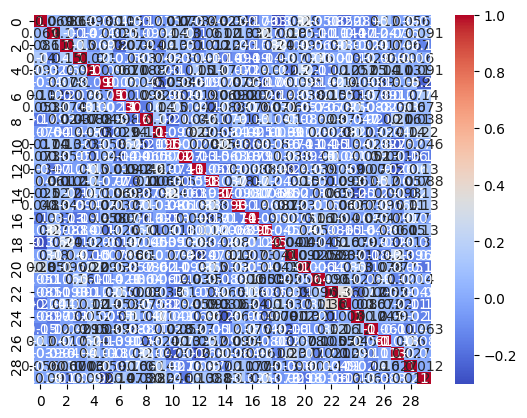

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataset
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data)

# (i) Replace values between [10,60] with NA and count missing rows
df[(df >= 10) & (df <= 60)] = np.nan
missing_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {missing_rows}")

# (ii) Replace NA with column average
df = df.fillna(df.mean())

# (iii) Pearson correlation, heatmap, and select columns with correlation <= -0.7
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
selected_cols = [col for col in corr.columns if any(corr[col] <= -0.7)]
df_selected = df[selected_cols]

# (iv) Normalize values between 0 and 10
df_normalized = (df - df.min()) / (df.max() - df.min()) * 10

# (v) Replace values with 1 if <= 0.5 else 0
df_final = np.where(df_normalized <= 0.5, 1, 0)

##**Q3. Create a random dataset of 500 rows and 10 columns.**

**Columns 1 to 4 are defined between [-10, 10];**

**Columns 5 to 8 are defined between [10, 20];**

**Columns 9 to 10 are defined between [-100, 100].**

Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric graph using each algorithm.

(i) K-Mean clustering

(ii) Hierarchical clustering

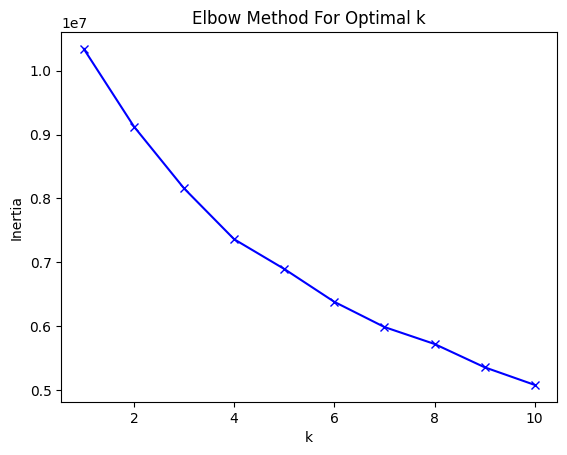

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Create dataset
data = np.concatenate([np.random.uniform(-10, 10, size=(500, 4)),
                      np.random.uniform(-100, 100, size=(500, 6))], axis=1)
df = pd.DataFrame(data)

# Determine optimal number of clusters and plot distance metric
def plot_elbow(data):
    inertias = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        inertias.append(kmeans.inertia_)
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()

# (i) K-Means clustering
plot_elbow(df)
kmeans = KMeans(n_clusters=3, random_state=42).fit(df)

# (ii) Hierarchical clustering
dist_matrix = squareform(pdist(df))
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df)

##**Q4. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. Perform the following operations:**
(i) Plot scatter graph between Column 5 and Column 6.

(ii) Plot histogram of each column in single graph.

(iii) Plot the Box plot of each column in single graph.

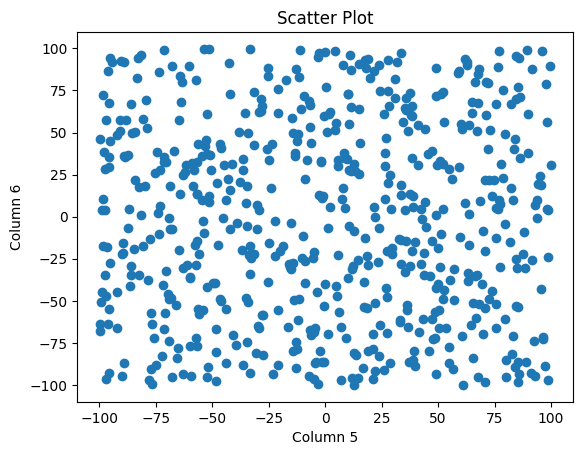

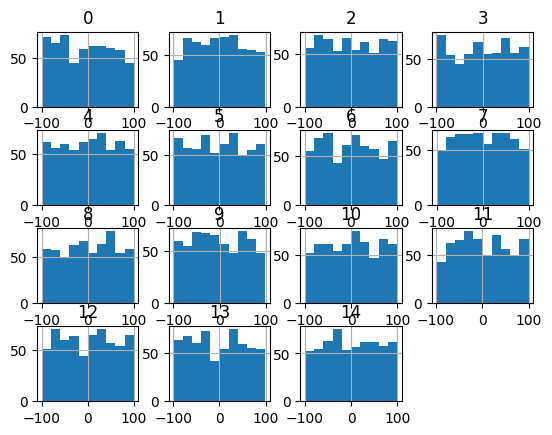

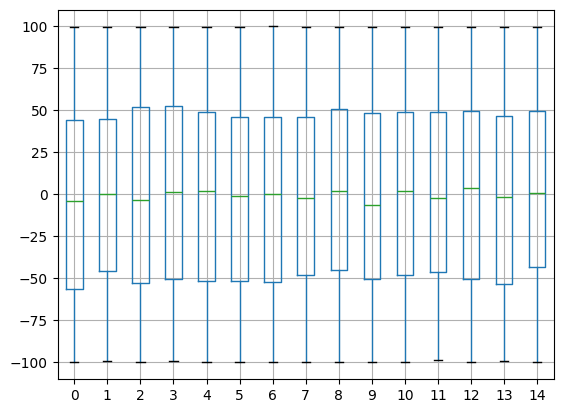

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create dataset
data = np.random.uniform(-100, 100, size=(600, 15))
df = pd.DataFrame(data)

# (i) Plot scatter graph between Column 5 and Column 6
plt.scatter(df[4], df[5])
plt.xlabel('Column 5')
plt.ylabel('Column 6')
plt.title('Scatter Plot')
plt.show()

# (ii) Plot histogram of each column in single graph
df.hist()
plt.show()

# (iii) Plot the Box plot of each column in single graph
df.boxplot()
plt.show()

##**Q5. Create a random dataset of 500 rows and 5 columns: All the values are defined between [5,10]. Perform the following operations:**
(i) Perform t-Test on each column.

(ii) Perform Wilcoxon Signed Rank Test on each column.

(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

# Create dataset
data = np.random.uniform(5, 10, size=(500, 5))
df = pd.DataFrame(data)

# (i) Perform t-Test on each column
for column in df.columns:
    t_stat, p_val = stats.ttest_1samp(df[column], popmean=df[column].mean())
    print(f"t-Test for Column {column}: t-statistic = {t_stat}, p-value = {p_val}")

# (ii) Perform Wilcoxon Signed Rank Test on each column
for column in df.columns:
    stat, p_val = stats.wilcoxon(df[column] - df[column].mean())
    print(f"Wilcoxon Signed Rank Test for Column {column}: statistic = {stat}, p-value = {p_val}")

# (iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
t_stat, p_val = stats.ttest_ind(df[2], df[3])
print(f"Two Sample t-Test: t-statistic = {t_stat}, p-value = {p_val}")
stat, p_val = stats.ranksums(df[2], df[3])
print(f"Wilcoxon Rank Sum Test: statistic = {stat}, p-value = {p_val}")

t-Test for Column 0: t-statistic = 0.0, p-value = 1.0
t-Test for Column 1: t-statistic = 0.0, p-value = 1.0
t-Test for Column 2: t-statistic = 0.0, p-value = 1.0
t-Test for Column 3: t-statistic = 0.0, p-value = 1.0
t-Test for Column 4: t-statistic = 0.0, p-value = 1.0
Wilcoxon Signed Rank Test for Column 0: statistic = 62365.0, p-value = 0.9358893763725504
Wilcoxon Signed Rank Test for Column 1: statistic = 62416.0, p-value = 0.9484452683384372
Wilcoxon Signed Rank Test for Column 2: statistic = 62572.0, p-value = 0.9869177878418007
Wilcoxon Signed Rank Test for Column 3: statistic = 62597.0, p-value = 0.993088419377158
Wilcoxon Signed Rank Test for Column 4: statistic = 62411.0, p-value = 0.947213681508311
Two Sample t-Test: t-statistic = 0.8848838849739465, p-value = 0.376432398945477
Wilcoxon Rank Sum Test: statistic = 0.9111739515756417, p-value = 0.362203726521399
